In [1]:
import numpy as np
import math
import torch
from torch import nn
from torch import functional as F
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'

In [3]:
torch.set_default_dtype(torch.float64)

In [4]:
mixture = [torch.distributions.normal.Normal(5.0, 0.5),
           torch.distributions.normal.Normal(-5.0, 1.5),
           torch.distributions.normal.Normal(2.0, 1.0)]
proportions = torch.tensor([0.05, 0.35, 0.6])

In [5]:
def logp(x):
    v = [None]*len(mixture)
    for j in range(len(mixture)):
        v[j] = mixture[j].log_prob(x) + proportions[j].log()
    return torch.logsumexp(torch.stack(v), dim=0)

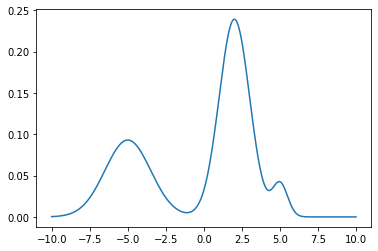

In [6]:
%matplotlib inline

x_lin = torch.arange(-10, 10.0, 0.01).unsqueeze(-1).to(device)
plt.plot(x_lin.detach().cpu().numpy(), logp(x_lin).exp().detach().cpu().numpy())
plt.show()

In [7]:
C = torch.distributions.categorical.Categorical(probs=proportions)

In [8]:
N = 100000
E = torch.tensor(0.0)
for _ in range(N):
    x = mixture[C.sample()].sample()
    E += logp(x)
E /= N
-E

tensor(2.3184)

In [9]:
from scipy.spatial.distance import squareform

In [10]:
N = 4
X = []
for _ in range(N):
    X.append(mixture[C.sample()].sample())
X = torch.stack(X)

In [11]:
X = X.double()

In [12]:
D = squareform(torch.nn.functional.pdist(X.unsqueeze(-1)))
np.fill_diagonal(D, np.inf)

In [13]:
np.fill_diagonal(D, np.inf)

In [14]:
a = np.amin(D, axis=0)

In [15]:
D = squareform(torch.nn.functional.pdist(X.unsqueeze(-1)))
np.fill_diagonal(D, np.inf)
a = np.amin(D, axis=0)
np.sum(np.log(a*len(a)))/len(a) + np.log(2) + 0.57721

0.8797146475811647

In [16]:
d = 1
k = 1

In [17]:
N = 20000
X = []
for _ in range(N):
    X.append(mixture[C.sample()].sample())
X = torch.stack(X)
X_ = X.repeat(len(X),1)

In [18]:
D = torch.sqrt((X_ - X_.t())**2)

In [19]:
g = torch.topk(D, k+1, dim=0, largest=False).values[-1]

In [20]:
torch.log(g*N).mean() + np.log(2) + 0.57721

tensor(2.3405)

In [21]:
k = 1
lcd = (d/2.0*torch.log(torch.tensor(np.pi))) - torch.lgamma(torch.tensor(1.0 + d/2.0))
torch.digamma(torch.tensor(N).float()).double() - torch.digamma(torch.tensor(k).float()).double() + lcd + d/N*torch.sum(torch.log(g))

tensor(2.3405)